<a href="https://colab.research.google.com/github/lukeolson/mse598dm-python-data/blob/main/visualizing/scrubbing-data-visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/lukeolson/mse598dm-python-data/raw/main/visualizing/random_map.png" width="700px;" alt="quad"/>

#  Scrubbing data and visualizing

## Objectives

### Objectives

1. Retrieve data and place in a pandas dataframe
2. Determine modifications needed in the data 
3. Match the data to visualization package

### Example Questions

1. How can we retrieve data from a webpage?
2. How can we parse hhtml?
3. What is a MultiIndex in Pandas?
4. What is a Choropleth map?

## Highlevel topics

- Data retrieval
- Data storage
- Data manipulation
- Visualization

## What to hand in
- As far as you can get!
- What did you learn about scrubbing data today?
    - 1. ...
    - 2. ...
    - 3. ...

## Synopsis

You're a structural engineer working on a team that analyses the bridge infrastructure in the US.  To make a convincing argument, you are constructing a map of the current bridge conditions across the US.

#### Your Task

Your goal is to plot the bridge conditions at the state level.

## Datasets

In this session two datasets will be used:
- Bridge Condition by Highway System 2022:
    - https://www.fhwa.dot.gov/bridge/nbi/no10/condition22.cfm
- Bridge Condition by County 2022:
    - https://www.fhwa.dot.gov/bridge/nbi/no10/county19.cfm
- In addition you will use the state/county level geo files:
    - `us-states.json`: https://github.com/python-visualization/folium/tree/master/examples/data
    - http://eric.clst.org/tech/usgeojson/

## Getting Started

We will introduce four new packages in this lesson:

- `requests` is a package the makes URL requests *easy*.  Give it a URL and it retrieves the page.
- `bs4` or BeautifulSoup parses an html file and places it in a convenient structure
- `json` is a package for reading structured JSON files
- `folium` is one of many packages that can be used to plot information on a geographical map

In [3]:
!pip install folium bs4 requests lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import folium          # visualizing maps
import os
import pandas as pd    # data frames
import bs4             # parse html
import requests        # make a url request
import json            # structured data format
from IPython.display import HTML, display

In [9]:
m = folium.Map(
    location=[40.114942, -88.226492],
    tiles='Stamen Toner',
    #tiles="Stamen Terrain",
    zoom_start=13
)

m

## First grab the webpage

Here we'll do two things:

1. retrieve the raw html of the webpage; and
2. parse the html to make a structured `soup`

In [10]:
url = 'https://www.fhwa.dot.gov/bridge/nbi/no10/condition22.cfm'
r = requests.get(url)                  # grab the html source
html = r.text                          # as text
soup = bs4.BeautifulSoup(html, 'html.parser') # make a parseable "tree" of html

We can do any number of things with `soup` at this point.  We can scrub for emails, find links, extract figures, etc.  In this case we wish to find all of the tables in the html.  `<table>` and `<table class="something">` are both examples of tags that we wish to find --- bs4 makes this easy -- try it with `find_all` (https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-using-tag-names)

```
table = ...
```
## <font color="red"> Try it! $\downarrow$</font>

In [11]:
table = soup.find_all('table')[0]
print(type(table))
display(HTML(str(table)))
#print(str(table))

<class 'bs4.element.Tag'>


If you have `table`, you can `find_all` on the resulting markup.
```
rows = table.find_all()
```

Use this to find all rows (marked with `tr`) in the table.

## <font color="red"> Try it! $\downarrow$</font>

In [12]:
rows = table.find_all('tr')

Let's print it:

In [13]:
print(rows[0])
print(rows[1])
print(rows[2])

<tr>
<th class="col30" rowspan="2" scope="col">State</th>
<th colspan="4" scope="colgroup">Bridge Counts</th>
<th colspan="4" scope="colgroup">Bridge Area (Square Meters)</th>
</tr>
<tr>
<th scope="col">All</th>
<th scope="col">Good</th>
<th scope="col">Fair</th>
<th scope="col">Poor</th>
<th scope="col">All</th>
<th scope="col">Good</th>
<th scope="col">Fair</th>
<th scope="col">Poor</th>
</tr>
<tr>
<th class="left" scope="row">ALABAMA</th>
<td class="txtright">16,162</td> <td class="txtright">6,416</td> <td class="txtright">9,171</td> <td class="txtright">575</td> <td class="txtright">10,023,643</td> <td class="txtright">3,586,400</td> <td class="txtright">6,299,506</td> <td class="txtright">137,737</td>
</tr>


### One approach

One approach is to zip through the rows, then parse each of the columns.  We may do this like the following:

In [14]:
for row in rows:
    
    # find all 'th' headers
    state_name = row.find('th', {"class": "left"})
    if state_name is not None:
        
        # get the state name
        state_name = state_name.text
        print(state_name)
        
        # get the next four data rows
        count = row.findAll('td')[:4]
        count = [int(c.text.replace(',','')) for c in count]
        print(count)

ALABAMA
[16162, 6416, 9171, 575]
ALASKA
[1626, 739, 761, 126]
ARIZONA
[8497, 5334, 3056, 107]
ARKANSAS
[12955, 6136, 6145, 674]
CALIFORNIA
[25810, 12091, 12172, 1547]
COLORADO
[8917, 3056, 5409, 452]
CONNECTICUT
[4353, 1253, 2875, 225]
DELAWARE
[872, 320, 538, 14]
DISTRICT OF COLUMBIA
[248, 78, 166, 4]
FLORIDA
[12740, 7871, 4414, 455]
GEORGIA
[15034, 11239, 3502, 293]
HAWAII
[1177, 284, 819, 74]
IDAHO
[4579, 1315, 3030, 234]
ILLINOIS
[26873, 12748, 11702, 2423]
INDIANA
[19367, 7916, 10411, 1040]
IOWA
[23835, 9320, 9911, 4604]
KANSAS
[24931, 13231, 10406, 1294]
KENTUCKY
[14482, 3915, 9554, 1013]
LOUISIANA
[12733, 5498, 5664, 1571]
MAINE
[2505, 678, 1472, 355]
MARYLAND
[5456, 1780, 3425, 251]
MASSACHUSETTS
[5252, 1330, 3478, 444]
MICHIGAN
[11314, 3951, 6094, 1269]
MINNESOTA
[13497, 7806, 5089, 602]
MISSISSIPPI
[16782, 9660, 6025, 1097]
MISSOURI
[24569, 9455, 12884, 2230]
MONTANA
[5278, 1624, 3287, 367]
NEBRASKA
[15336, 7952, 6164, 1220]
NEVADA
[2071, 1184, 858, 29]
NEW HAMPSHIRE
[2531, 1

### Another (easier) approach

The previous approach is often necessary.  Dirty data, incomplete html, different formats, etc often force us to parse the html by hand.  However in the case of a table, Pandas can be used directly:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html

How can we use pandas to read the soup table?
## <font color="red"> Try it! $\downarrow$</font>

In [15]:
df = pd.read_html(str(table))[0]

# even easier:
# df = pd.read_html(url)[0]

Print the dataframe:

In [16]:
df

State Bridge Counts                         \
                   State           All    Good    Fair   Poor   
0                ALABAMA         16162    6416    9171    575   
1                 ALASKA          1626     739     761    126   
2                ARIZONA          8497    5334    3056    107   
3               ARKANSAS         12955    6136    6145    674   
4             CALIFORNIA         25810   12091   12172   1547   
5               COLORADO          8917    3056    5409    452   
6            CONNECTICUT          4353    1253    2875    225   
7               DELAWARE           872     320     538     14   
8   DISTRICT OF COLUMBIA           248      78     166      4   
9                FLORIDA         12740    7871    4414    455   
10               GEORGIA         15034   11239    3502    293   
11                HAWAII          1177     284     819     74   
12                 IDAHO          4579    1315    3030    234   
13              ILLINOIS         26873   12748   11702   2423   
14               INDIANA         19367    7916   10411   1040   
15                  IOWA         23835    9320    9911   4604   
16                KANSAS         24931   13231   10406   1294   
17              KENTUCKY         14482    3915    9554   1013   
18             LOUISIANA         12733    5498    5664   1571   
19                 MAINE          2505     678    1472    355   
20              MARYLAND          5456    1780    3425    251   
21         MASSACHUSETTS          5252    1330    3478    444   
22              MICHIGAN         11314    3951    6094   1269   
23             MINNESOTA         13497    7806    5089    602   
24           MISSISSIPPI         16782    9660    6025   1097   
25              MISSOURI         24569    9455   12884   2230   
26               MONTANA          5278    1624    3287    367   
27              NEBRASKA         15336    7952    6164   1220   
28                NEVADA          2071    1184     858     29   
29         NEW HAMPSHIRE          2531    1339    1002    190   
30            NEW JERSEY          6805    1791    4559    455   
31            NEW MEXICO          4033    1441    2393    199   
32              NEW YORK         17557    6350    9596   1611   
33        NORTH CAROLINA         18822    7791    9728   1303   
34          NORTH DAKOTA          4281    1901    1931    449   
35                  OHIO         27003   16437    9343   1223   
36              OKLAHOMA         23197    9824   11166   2207   
37                OREGON          8255    2802    5057    396   
38          PENNSYLVANIA         23202    7798   12292   3112   
39          RHODE ISLAND           784     168     486    130   
40        SOUTH CAROLINA          9427    4095    4855    477   
41          SOUTH DAKOTA          5897    1950    2951    996   
42             TENNESSEE         20377    8621   10875    881   
43                 TEXAS         55701   28040   26887    774   
44                  UTAH          3080     858    2158     64   
45               VERMONT          2846    1493    1282     71   
46              VIRGINIA         14042    4668    8873    501   
47            WASHINGTON          8388    4291    3674    423   
48         WEST VIRGINIA          7317    1711    4145   1461   
49             WISCONSIN         14336    7356    6058    922   
50               WYOMING          3121     967    1949    205   
51                  GUAM            57      23      26      8   
52           PUERTO RICO          2335     410    1613    312   
53   U.S. VIRGIN ISLANDS            24       4      13      7   
54                TOTALS        620669  276309  301394  42966   

   Bridge Area (Square Meters)                                  
                           All       Good       Fair      Poor  
0                     10023643    3586400    6299506    137737  
1                       764734     289724     422590     52421  
2                      6116464    3395973    2650276 

Now lets just take the state name and the bridge counts to make the dataframe a bit more manageable:

In [25]:
dfcounts = df[['State','Bridge Counts']].copy()
dfcounts

State Bridge Counts                       
                   State           All    Good    Fair   Poor
0                ALABAMA         16162    6416    9171    575
1                 ALASKA          1626     739     761    126
2                ARIZONA          8497    5334    3056    107
3               ARKANSAS         12955    6136    6145    674
4             CALIFORNIA         25810   12091   12172   1547
5               COLORADO          8917    3056    5409    452
6            CONNECTICUT          4353    1253    2875    225
7               DELAWARE           872     320     538     14
8   DISTRICT OF COLUMBIA           248      78     166      4
9                FLORIDA         12740    7871    4414    455
10               GEORGIA         15034   11239    3502    293
11                HAWAII          1177     284     819     74
12                 IDAHO          4579    1315    3030    234
13              ILLINOIS         26873   12748   11702   2423
14               INDIANA         19367    7916   10411   1040
15                  IOWA         23835    9320    9911   4604
16                KANSAS         24931   13231   10406   1294
17              KENTUCKY         14482    3915    9554   1013
18             LOUISIANA         12733    5498    5664   1571
19                 MAINE          2505     678    1472    355
20              MARYLAND          5456    1780    3425    251
21         MASSACHUSETTS          5252    1330    3478    444
22              MICHIGAN         11314    3951    6094   1269
23             MINNESOTA         13497    7806    5089    602
24           MISSISSIPPI         16782    9660    6025   1097
25              MISSOURI         24569    9455   12884   2230
26               MONTANA          5278    1624    3287    367
27              NEBRASKA         15336    7952    6164   1220
28                NEVADA          2071    1184     858     29
29         NEW HAMPSHIRE          2531    1339    1002    190
30            NEW JERSEY          6805    1791    4559    455
31            NEW MEXICO          4033    1441    2393    199
32              NEW YORK         17557    6350    9596   1611
33        NORTH CAROLINA         18822    7791    9728   1303
34          NORTH DAKOTA          4281    1901    1931    449
35                  OHIO         27003   16437    9343   1223
36              OKLAHOMA         23197    9824   11166   2207
37                OREGON          8255    2802    5057    396
38          PENNSYLVANIA         23202    7798   12292   3112
39          RHODE ISLAND           784     168     486    130
40        SOUTH CAROLINA          9427    4095    4855    477
41          SOUTH DAKOTA          5897    1950    2951    996
42             TENNESSEE         20377    8621   10875    881
43                 TEXAS         55701   28040   26887    774
44                  UTAH          3080     858    2158     64
45               VERMONT          2846    1493    1282     71
46              VIRGINIA         14042    4668    8873    501
47            WASHINGTON          8388    4291    3674    423
48         WEST VIRGINIA          7317    1711    4145   1461
49             WISCONSIN         14336    7356    6058    922
50               WYOMING          3121     967    1949    205
51                  GUAM            57      23      26      8
52           PUERTO RICO          2335     410    1613    312
53   U.S. VIRGIN ISLANDS            24       4      13      7
54                TOTALS        620669  276309  301394  42966

### A MultiIndex?!

If we take a look a the column names we run into another type in Pandas: a MultiIndex.

In [26]:
dfcounts.columns

MultiIndex([(        'State', 'State'),
            ('Bridge Counts',   'All'),
            ('Bridge Counts',  'Good'),
            ('Bridge Counts',  'Fair'),
            ('Bridge Counts',  'Poor')],
           )

One easy thing to do in this case (mainly to make referencing a specific column easier) is to reduce to the column header to a simple `Index`.  Here we'll just use the second level of the MultiIndex:

In [27]:
dfcounts.columns = dfcounts.columns.get_level_values(1)
print(dfcounts.columns)
dfcounts

Index(['State', 'All', 'Good', 'Fair', 'Poor'], dtype='object')


,State,All,Good,Fair,Poor
0,ALABAMA,16162,6416,9171,575
1,ALASKA,1626,739,761,126
2,ARIZONA,8497,5334,3056,107
3,ARKANSAS,12955,6136,6145,674
4,CALIFORNIA,25810,12091,12172,1547
5,COLORADO,8917,3056,5409,452
6,CONNECTICUT,4353,1253,2875,225
7,DELAWARE,872,320,538,14
8,DISTRICT OF COLUMBIA,248,78,166,4
9,FLORIDA,12740,7871,4414,455


### Look ahead

Looking ahead to our mapping, we'll be using a GEO file, and each state name will be in the form of `Illinois` or `New Mexico`, etc.  However, in the data frame of bridge data, notice that each state name is in all caps. To fix this, we'll use the `.title()` command and return to lesson1:

In [28]:
'NEW MEXICO'.title()


'New Mexico'

In [29]:
'U.S. VIRGIN ISLANDS'.title()

'U.S. Virgin Islands'


Let's use this to change the string in the `State` column:

## <font color="red"> Try it! $\downarrow$</font>

In [52]:
def f(x):
    try:
        y = x.title()
    except:
        raise ValueError('Oops!')
    return y
dfcounts['State'] = dfcounts['State'].apply(f)

Now look at our modified data:

In [34]:
dfcounts

,State,All,Good,Fair,Poor
0,ALABAMA,16162,6416,9171,575
1,ALASKA,1626,739,761,126
2,ARIZONA,8497,5334,3056,107
3,ARKANSAS,12955,6136,6145,674
4,CALIFORNIA,25810,12091,12172,1547
5,COLORADO,8917,3056,5409,452
6,CONNECTICUT,4353,1253,2875,225
7,DELAWARE,872,320,538,14
8,DISTRICT OF COLUMBIA,248,78,166,4
9,FLORIDA,12740,7871,4414,455


# Your Turn:  Displaying the Data on a Map

Your job is to visualize the information about the bridges on a map (choropleth visualization).  To get you started, this section will go through some examples first of some basic maps with other data.  Go through these examples to get an understanding for the map visualization then complete the 2 tasks at the bottom.

## Example 1:  Our first map

Let's make a map instance with `folium`. Here we set the lat/long coordinates to the Beckman Quad.  The tiles parameter is used to determine they style of the map.  

(You can use `folium.Map?` in this notebook to experiment with different map types!).  

In [35]:
folium.Map?

In [ ]:
m = folium.Map(
    location=[40.114942, -88.226492],
    tiles='Stamen Toner',
    zoom_start=13
)

m

The above example illustrated a map for some specific lat/long coordinates.  In practice, we'll want to display some information on the map.  We'll start in the next example with a simple visualization of data on a map.

## Example 2:  Starting Map with State Data (3 states)

Let's start with a basic visualization of data for 3 states: Iowa, Illinois, and Colorado.  Let's assume we have the following dataframe with some data for a few states. 

In [36]:
df = pd.DataFrame(
    [
        ['Iowa', 'Illinois', 'Colorado'],
        [5, 1, 100]],
    index=['State', 'Some Value']
).T

print(df)

      State Some Value
0      Iowa          5
1  Illinois          1
2  Colorado        100


### State JSON Info

To plot on map with Folium, a JSON file is used to describe the polygons that will represent each state.  For example,  Illinois is composed of a list of coordinates -- [check it out](https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json):

In [39]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
r = requests.get(url) # grab the source from the url
state_geo = r.json()  # convert to `json`
state_geo['features'][12]

{'type': 'Feature',
 'id': 'IL',
 'properties': {'name': 'Illinois'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-90.639984, 42.510065],
    [-88.788778, 42.493634],
    [-87.802929, 42.493634],
    [-87.83579, 42.301941],
    [-87.682436, 42.077386],
    [-87.523605, 41.710431],
    [-87.529082, 39.34987],
    [-87.63862, 39.169131],
    [-87.512651, 38.95553],
    [-87.49622, 38.780268],
    [-87.62219, 38.637868],
    [-87.655051, 38.506421],
    [-87.83579, 38.292821],
    [-87.950806, 38.27639],
    [-87.923421, 38.15042],
    [-88.000098, 38.101128],
    [-88.060345, 37.865619],
    [-88.027483, 37.799896],
    [-88.15893, 37.657496],
    [-88.065822, 37.482234],
    [-88.476592, 37.389126],
    [-88.514931, 37.285064],
    [-88.421823, 37.153617],
    [-88.547792, 37.071463],
    [-88.914747, 37.224817],
    [-89.029763, 37.213863],
    [-89.183118, 37.038601],
    [-89.133825, 36.983832],
    [-89.292656, 36.994786],
    [-89.517211, 37.279587],
    [-89.435057, 37.34

## Just plot it
We could just plot this polygon data on our own:

(-117.4750745, -86.06865549999999, 36.38301165, 49.60105935)

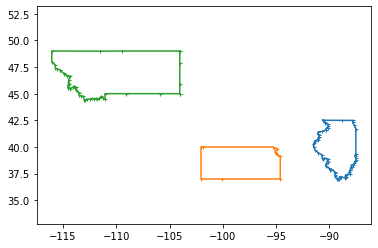

In [40]:
import matplotlib.pyplot as plt
import numpy as np
coords = state_geo['features'][12]['geometry']['coordinates'][0]
coords = np.array(coords)
plt.plot(coords[:,0], coords[:,1], '-+', ms=3)
coords = state_geo['features'][15]['geometry']['coordinates'][0]
coords = np.array(coords)
plt.plot(coords[:,0], coords[:,1], '-+', ms=3)
coords = state_geo['features'][25]['geometry']['coordinates'][0]
coords = np.array(coords)
plt.plot(coords[:,0], coords[:,1], '-+', ms=3)
plt.axis('equal')

We printed just Illinois above, but  `state_geo` contains the polygons for each of the states.

### Creating Map with State Data

To create a Choropleth, we first initialize a map with folium like we did in the basic example above.  Then, we call `folium.Choropleth()`. 

**What is a Choropleth?** https://en.wikipedia.org/wiki/Choropleth_map

The call to set the `Choropleth` map has 4 important entries:

- `geo_data=state_geo`, here we set the geo data.
- `data=df`, here we set the data *source* (the stuff we'll plot on each state)
- `columns=['State', 'Some Value']`, where to find the state name or state id and the numbers to visualize (in `data`)
- `key_on='feature.properties.name'`, how the entries are represented in the JSON.  For the state geo_data json file, this will be either `'feature.id'` (abbreviation) or `'feature.properties.name'` (name), depending on whether our dataframe uses state names or abbreviations. 

The other parameters control specifics of looks of the visualization (opacity, coloring).

In [57]:
m = folium.Map(location=[44, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=dfcounts,
    columns=['State', 'Some Value'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.6,
    line_opacity=0.2,
).add_to(m)

folium.LayerControl().add_to(m)

m

KeyError: ignored

## Example 3:  Full Example with Unemployment Data

For this next part we'll take straight out of the Folium examples.

As before, we use the same json state geo data.  This example reads in unemployment data into a pandas dataframe.  The call to `folium.Choropleth()` is roughly the same as the above, except this dataframe, `state_data`, uses abbreviations not full names, so `key_on=` a different value.  Additionally, the coloring is a little different and the colorbar is labeled.

## <font color="red"> Try it! $\downarrow$</font>

In [54]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(url)
state_data[:5]

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [58]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
state_geo = requests.get(url).json()

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(url)

m = folium.Map(location=[48, -102], zoom_start=5)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    # vvvv fill this in
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.properties.name',
    #######
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m


# Your Tasks:
Now that you've seen some examples, it's time for you to visualize the bridge data that is the topic of this lesson.

Your task is to create 2 different choropleth visualizations based on the bridge data (each is described below).

## Task \#1:

Create a choropleth visualization that illustrates the number of bridges in each state.

Hint:  Think about what the visualization should look like based on the data.  If your visualized results are not as expected, it may help to look at the dataframe to identify what is happening.  Notice any rows that aren't simply state data?
## <font color="red"> Try it! $\downarrow$</font>

In [59]:
dfcounts[-5:]

,State,All,Good,Fair,Poor
50,Wyoming,3121,967,1949,205
51,Guam,57,23,26,8
52,Puerto Rico,2335,410,1613,312
53,U.S. Virgin Islands,24,4,13,7
54,Totals,620669,276309,301394,42966


In [98]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
state_geo = requests.get(url).json()

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    # fill this in vvvv
    data=dfcounts,
    columns=['State', 'All'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

folium.LayerControl().add_to(m)

m

## Task \#2

Create a different choropleth visualization that illustrates the percentage of bridges in each state rated as poor.  

Hint:  this value is not currently in the dataframe of bridge data -- you'll need to compute it first

## <font color="red"> Try it! $\downarrow$</font>

In [100]:
dfcounts['Percent in Poor Condition'] = 100*dfcounts['Poor']/dfcounts['All']
dfcounts

,State,All,Good,Fair,Poor,Percent in Poor Condition
0,Alabama,16162,6416,9171,575,3.557728
1,Alaska,1626,739,761,126,7.749077
2,Arizona,8497,5334,3056,107,1.259268
3,Arkansas,12955,6136,6145,674,5.202624
4,California,25810,12091,12172,1547,5.993801
5,Colorado,8917,3056,5409,452,5.068969
6,Connecticut,4353,1253,2875,225,5.168849
7,Delaware,872,320,538,14,1.605505
8,District Of Columbia,248,78,166,4,1.612903
9,Florida,12740,7871,4414,455,3.571429


In [102]:
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=dfcounts[:-1],
    columns=['State', 'Percent in Poor Condition'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percent of Bridges Ranked as Poor (%)'
).add_to(m)

folium.LayerControl().add_to(m)
m